In [1]:
include("cutoff.jl")

hitting_time_pr (generic function with 1 method)

432/100000 paths did not converge to 0 within 20 steps.


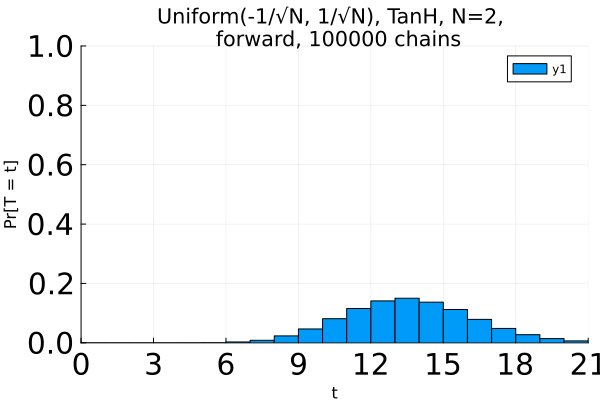

In [13]:
# for N = 1:12
N = 2
X₀_Dist = Uniform(-1, 1)
WeightDist = Uniform(-1/√N, 1/√N)

# WeightDist = Uniform(-1, 1)
# WeightDist = Normal(0.0, 1)
# WeightDist = Normal(0.0, 1/√N)
# activation = σ
activation = tanh
num_chains = 100000
step_size = 0.0001
ϵ = step_size/2
num_steps = 20
forward = true
store_steps = false

Exp = Experiment(X₀_Dist, N, num_chains, WeightDist, activation, step_size, num_steps, forward, store_steps)
times, hist = hitting_times(Exp)


diststr_greek, diststr_nongreek, actstr, dynamicsstr = get_plotting_strs(Exp)
p = plot(hist,
    title="$diststr_greek, $actstr, N=$N, \n $dynamicsstr, $num_chains chains",
    xlabel="t",
    ylabel="Pr[T = t]",
    fontsize=30,
    tickfontsize=20,
    xlim=(0, num_steps+1),
    ylim=(0, 1)
)
display(p)
# savefig(p, "imgs/hitting_times/hitting_times $diststr_nongreek $actstr $dynamicsstr N=$N.png")
# end

In [224]:
println_hist(hist)

Pr[T=0]: 0.0
Pr[T=1]: 0.05344
Pr[T=2]: 0.09780000000000001
Pr[T=3]: 0.14415
Pr[T=4]: 0.16054000000000002
Pr[T=5]: 0.14941000000000002
Pr[T=6]: 0.12278000000000001
Pr[T=7]: 0.09257000000000001
Pr[T=8]: 0.06398000000000001
Pr[T=9]: 0.04376
Pr[T=10]: 0.027680000000000003


In [225]:
hitting_time_pr(N, 1, eps)

LoadError: "Hitting times can only be computed in the closed form for N=1, recieved N=2."

In [226]:
""" The below function is almost certainly wrong.
"""

function analytical_pr(N, eps)
    Z = Normal(0, 1)
    sd = sqrt(1/9)
    
    (2 * cdf(Z, atanh(eps)/ (sd * sqrt(N))) - 1)^N
end

analytical_pr(N, eps)

0.02840940596531584

In [237]:
N = 1
total = 0
for t = 1:13
    total += hitting_time_pr(N, t, eps)
end
total

0.9999998434584402

In [235]:
hitting_time_pr(N, 1, eps)

0.33103011432293594

In [246]:
atanh(eps)*(1 - ln(atanh(eps))) + ln(atanh(eps))* (1 - 1/atanh(eps))

1054.3861588254313

In [247]:
atanh(eps)*(1 - ln(atanh(eps)))

0.031491807599101626

In [248]:
(1 - 1/atanh(eps))

-198.99833332222207

In [257]:
atanh(eps) - ln(atanh(eps))

9.903537551703613

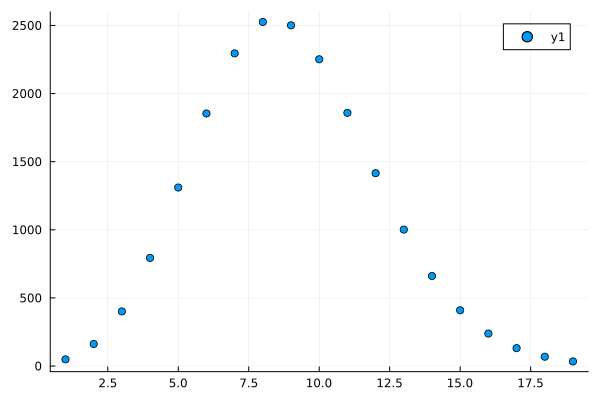

In [266]:
xs = []
a = atanh(eps)
for t = 2:20
    pr = ln(1/a)^t/factorial(t)
    push!(xs, pr)
end

scatter(xs)

In [17]:
Z = Normal(0, 1)
numer = 0.004
denom = 0.01

cdf(Z, numer/denom)

0.6554217416103242